In [7]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 10.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 10.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip


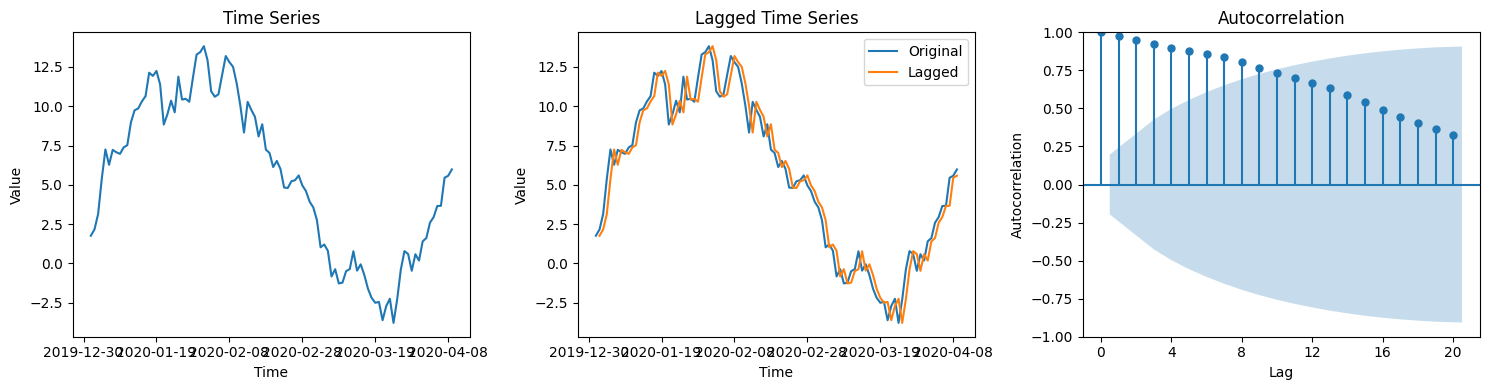

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate random time series data
np.random.seed(0)
time_index = pd.date_range(start='1/1/2020', periods=100, freq='D')
data = np.random.randn(100).cumsum()
ts = pd.Series(data, index=time_index)

# Create the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Plot the time series
axes[0].plot(ts)
axes[0].set_title('Time Series')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')

# Plot the lagged time series
lagged_ts = ts.shift()
axes[1].plot(ts, label='Original')
axes[1].plot(lagged_ts, label='Lagged')
axes[1].set_title('Lagged Time Series')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Value')
axes[1].legend()

# Plot the autocorrelation
plot_acf(ts, lags=20, alpha=0.05, ax=axes[2])
axes[2].set_title('Autocorrelation')
axes[2].set_xlabel('Lag')
axes[2].set_ylabel('Autocorrelation')

# Adjust the x-axis labels
for ax in axes:
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Limit the number of x-axis labels to 6

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


Model Formula: y(t) = 0.04 + 0.52 * y(t-1) + 0.09 * y(t-2) + 0.00 * y(t-3) + -0.06 * y(t-4)


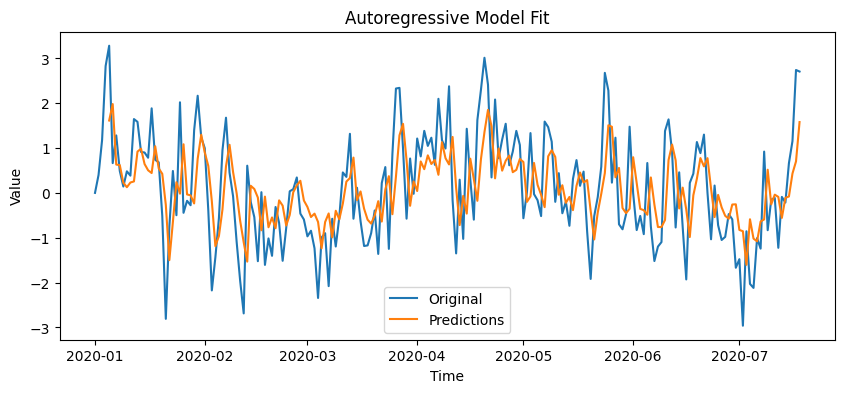

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Generate a stationary time series
np.random.seed(0)
time_index = pd.date_range(start='1/1/2020', periods=200, freq='D')
epsilon = np.random.normal(loc=0, scale=1, size=200)
stationary_ts = pd.Series(0, index=time_index)  # Initialize an empty time series

for i in range(1, len(stationary_ts)):
    stationary_ts[i] = 0.5 * stationary_ts[i-1] + epsilon[i]

# Fit an autoregressive model
order = 4
model = AutoReg(stationary_ts, lags=order)
model_fit = model.fit()

# Generate predictions
start_index = order
end_index = len(stationary_ts) - 1
predictions = model_fit.predict(start=start_index, end=end_index)

# Print model formula and coefficients
model_formula = 'y(t) = '
for i, coeff in enumerate(model_fit.params):
    if i == 0:
        model_formula += f'{coeff:.2f}'
    else:
        model_formula += f' + {coeff:.2f} * y(t-{i})'
print(f'Model Formula: {model_formula}')

# Plot the original stationary time series and the predictions
plt.figure(figsize=(10, 4))
plt.plot(stationary_ts, label='Original')
plt.plot(predictions, label='Predictions')
plt.title('Autoregressive Model Fit')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Model Formula: y(t) = 0.78 + 0.81 * ε(t-1) + 0.64 * ε(t-2) + 0.26 * ε(t-3)


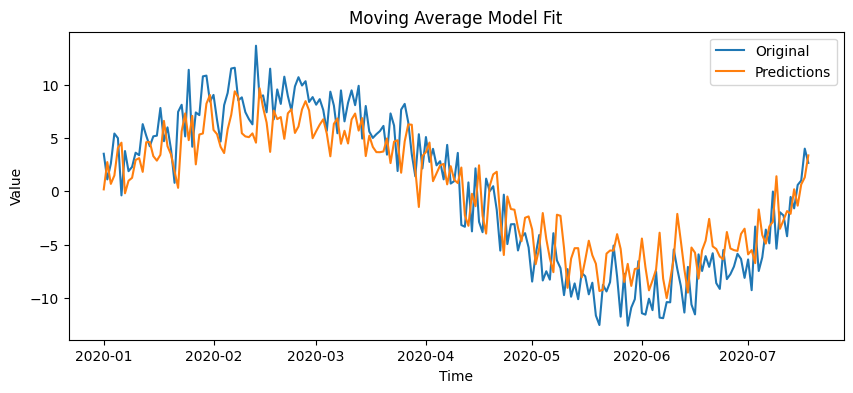

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate a time series with a moving average pattern
np.random.seed(0)
time_index = pd.date_range(start='1/1/2020', periods=200, freq='D')

# Create a moving average pattern
moving_avg = np.sin(np.linspace(0, 2 * np.pi, 200)) * 10

# Add noise to the moving average pattern
epsilon = np.random.normal(loc=0, scale=2, size=200)

# Combine the moving average pattern and noise to create the time series
ts = pd.Series(moving_avg + epsilon, index=time_index)

# Fit a moving average (MA) model
order = (0, 0, 4)  # (p, d, q) order of the ARIMA model, set p=0 and d=0 for MA model
model = ARIMA(ts, order=order)
model_fit = model.fit()

# Generate predictions
predictions = model_fit.predict()

# Print model formula and coefficients
model_formula = 'y(t) = '
for i, coeff in enumerate(model_fit.maparams):
    if i == 0:
        model_formula += f'{coeff:.2f}'
    else:
        model_formula += f' + {coeff:.2f} * ε(t-{i})'
print(f'Model Formula: {model_formula}')

# Plot the original time series and the predictions
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Original')
plt.plot(predictions, label='Predictions')
plt.title('Moving Average Model Fit')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


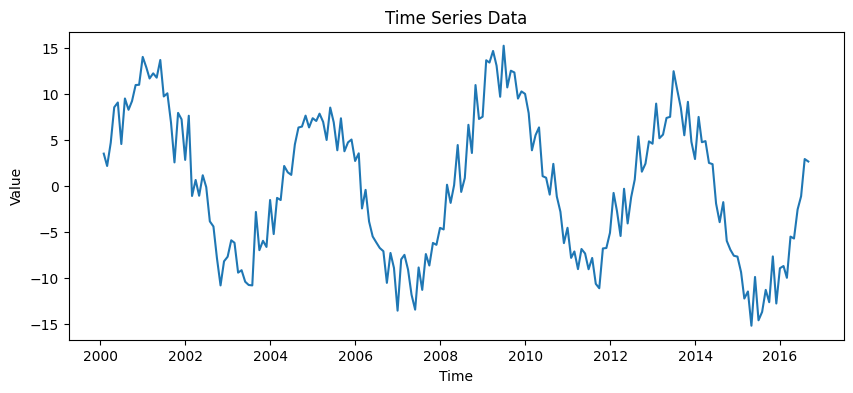

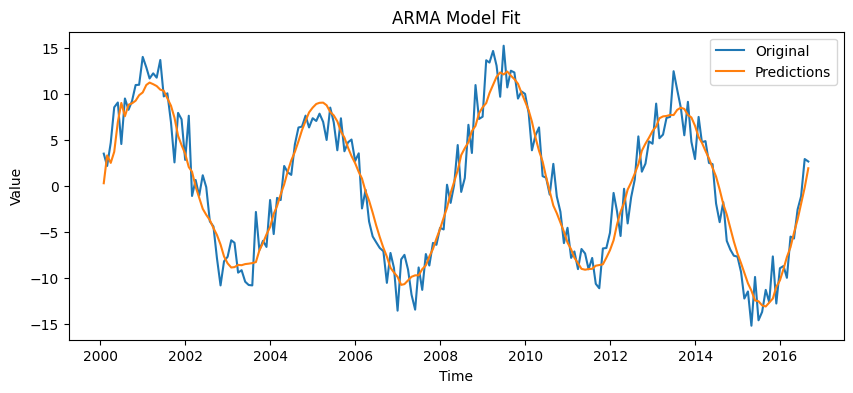

Model Formula: y(t) = 1.98 * y(t-1) + -1.00 * y(t-2)


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate a time series dataset
np.random.seed(0)
time_index = pd.date_range(start='1/1/2000', periods=200, freq='M')
trend = 2 * np.sin(np.linspace(0, 4 * np.pi, 200))
seasonality = 10 * np.sin(np.linspace(0, 8 * np.pi, 200))
epsilon = np.random.normal(loc=0, scale=2, size=200)
data = trend + seasonality + epsilon
ts = pd.Series(data, index=time_index)

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(ts)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Fit an ARMA model
order = (2, 0, 2)  # (p, d, q) order of the ARIMA model, set d=0 for ARMA
model = ARIMA(ts, order=order)
model_fit = model.fit()

# Generate predictions
predictions = model_fit.predict()

# Plot the original time series and the predictions
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Original')
plt.plot(predictions, label='Predictions')
plt.title('ARMA Model Fit')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Print model summary
#print(model_fit.summary())

# Print model formula
ar_coefs = model_fit.arparams
ma_coefs = model_fit.maparams
model_formula = 'y(t) = '
for i, coef in enumerate(ar_coefs):
    if i == 0:
        model_formula += f'{coef:.2f} * y(t-{i+1})'
    else:
        model_formula += f' + {coef:.2f} * y(t-{i+1})'
print(f'Model Formula: {model_formula}')


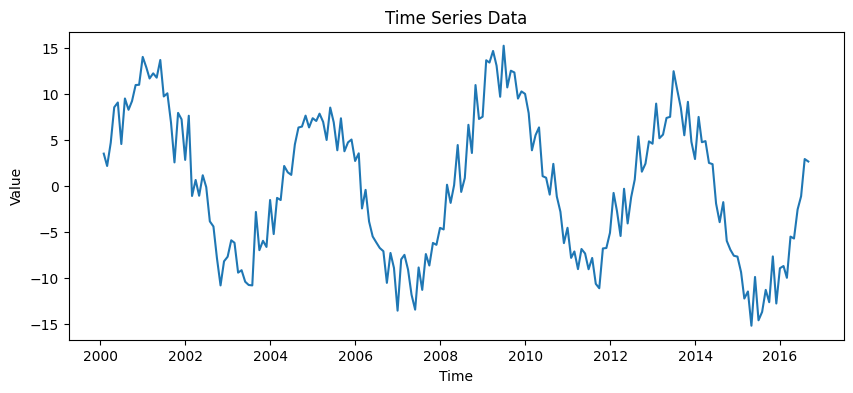

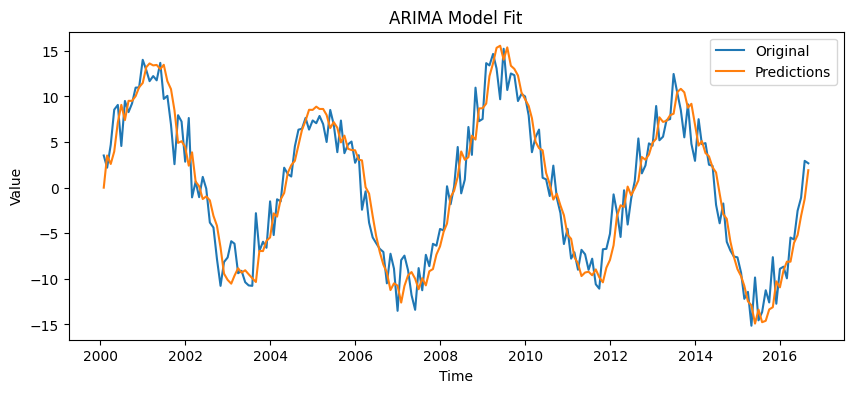

Model Formula: y(t) = 1.09 * y(t-1) + -0.16 * y(t-2)


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate a time series dataset
np.random.seed(0)
time_index = pd.date_range(start='1/1/2000', periods=200, freq='M')
trend = 2 * np.sin(np.linspace(0, 4 * np.pi, 200))
seasonality = 10 * np.sin(np.linspace(0, 8 * np.pi, 200))
epsilon = np.random.normal(loc=0, scale=2, size=200)
data = trend + seasonality + epsilon
ts = pd.Series(data, index=time_index)

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(ts)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Fit an ARIMA model
order = (2, 1, 2)  # (p, d, q) order of the ARIMA model, set d=0 for ARMA
model = ARIMA(ts, order=order)
model_fit = model.fit()

# Generate predictions
predictions = model_fit.predict()

# Plot the original time series and the predictions
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Original')
plt.plot(predictions, label='Predictions')
plt.title('ARIMA Model Fit')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Print model summary
# print(model_fit.summary())

# Print model formula
ar_coefs = model_fit.arparams
ma_coefs = model_fit.maparams
model_formula = 'y(t) = '
for i, coef in enumerate(ar_coefs):
    if i == 0:
        model_formula += f'{coef:.2f} * y(t-{i+1})'
    else:
        model_formula += f' + {coef:.2f} * y(t-{i+1})'
print(f'Model Formula: {model_formula}')


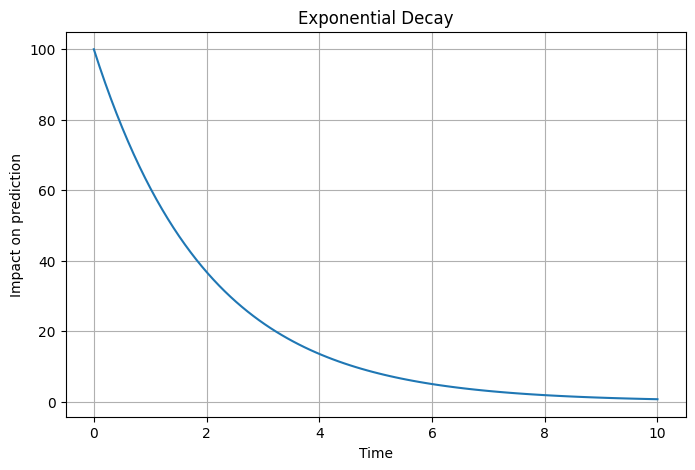

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the decay parameters
A = 100  # Initial value
k = 0.5  # Decay constant

# Generate the time values
t = np.linspace(0, 10, 100)  # Time values from 0 to 10

# Calculate the exponential decay
y = A * np.exp(-k * t)

# Plot the exponential decay curve
plt.figure(figsize=(8, 5))
plt.plot(t, y)
plt.title('Exponential Decay')
plt.xlabel('Time')
plt.ylabel('Impact on prediction')
plt.grid(True)
plt.show()
